In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/Factor_analysis_dataset.csv")

In [ ]:
df.head()

,Credit_Score,Income,Debt_to_Income,Investment_Risk_Tolerance,Investment_Experience,Portfolio_Diversity,Monthly_Transactions,Avg_Transaction_Value,Savings_Rate,Late_Payments
0,731,68665,0.27,5,3,4,59,700,0.13,5
1,681,56314,0.29,5,4,6,48,1028,0.15,4
2,739,65662,0.25,6,5,5,43,1082,0.19,2
3,781,69873,0.21,7,4,5,40,1166,0.17,3
4,697,55954,0.30,3,2,2,42,803,0.15,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Credit_Score               200 non-null    int64  
 1   Income                     200 non-null    int64  
 2   Debt_to_Income             200 non-null    float64
 3   Investment_Risk_Tolerance  200 non-null    int64  
 4   Investment_Experience      200 non-null    int64  
 5   Portfolio_Diversity        200 non-null    int64  
 6   Monthly_Transactions       200 non-null    int64  
 7   Avg_Transaction_Value      200 non-null    int64  
 8   Savings_Rate               200 non-null    float64
 9   Late_Payments              200 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 15.8 KB


In [ ]:
df.describe()

,Credit_Score,Income,Debt_to_Income,Investment_Risk_Tolerance,Investment_Experience,Portfolio_Diversity,Monthly_Transactions,Avg_Transaction_Value,Savings_Rate,Late_Payments
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.00000,200.000000
mean,698.495000,60315.080000,0.282800,5.090000,3.09000,4.255000,45.505000,1168.715000,0.17665,3.210000
std,41.153713,8723.299261,0.039737,1.280664,1.16563,1.569167,5.881576,291.530468,0.04049,1.720669
min,574.000000,38876.000000,0.160000,1.000000,0.00000,1.000000,25.000000,544.000000,0.06000,0.000000
25%,668.000000,54125.500000,0.260000,4.000000,2.00000,3.000000,41.000000,961.750000,0.15000,2.000000
50%,697.000000,60093.000000,0.280000,5.000000,3.00000,4.000000,46.000000,1163.000000,0.18000,3.000000
75%,727.250000,66532.750000,0.310000,6.000000,4.00000,5.000000,50.000000,1368.250000,0.20000,4.000000
max,818.000000,87593.000000,0.390000,10.000000,7.00000,10.000000,59.000000,1974.000000,0.31000,8.000000


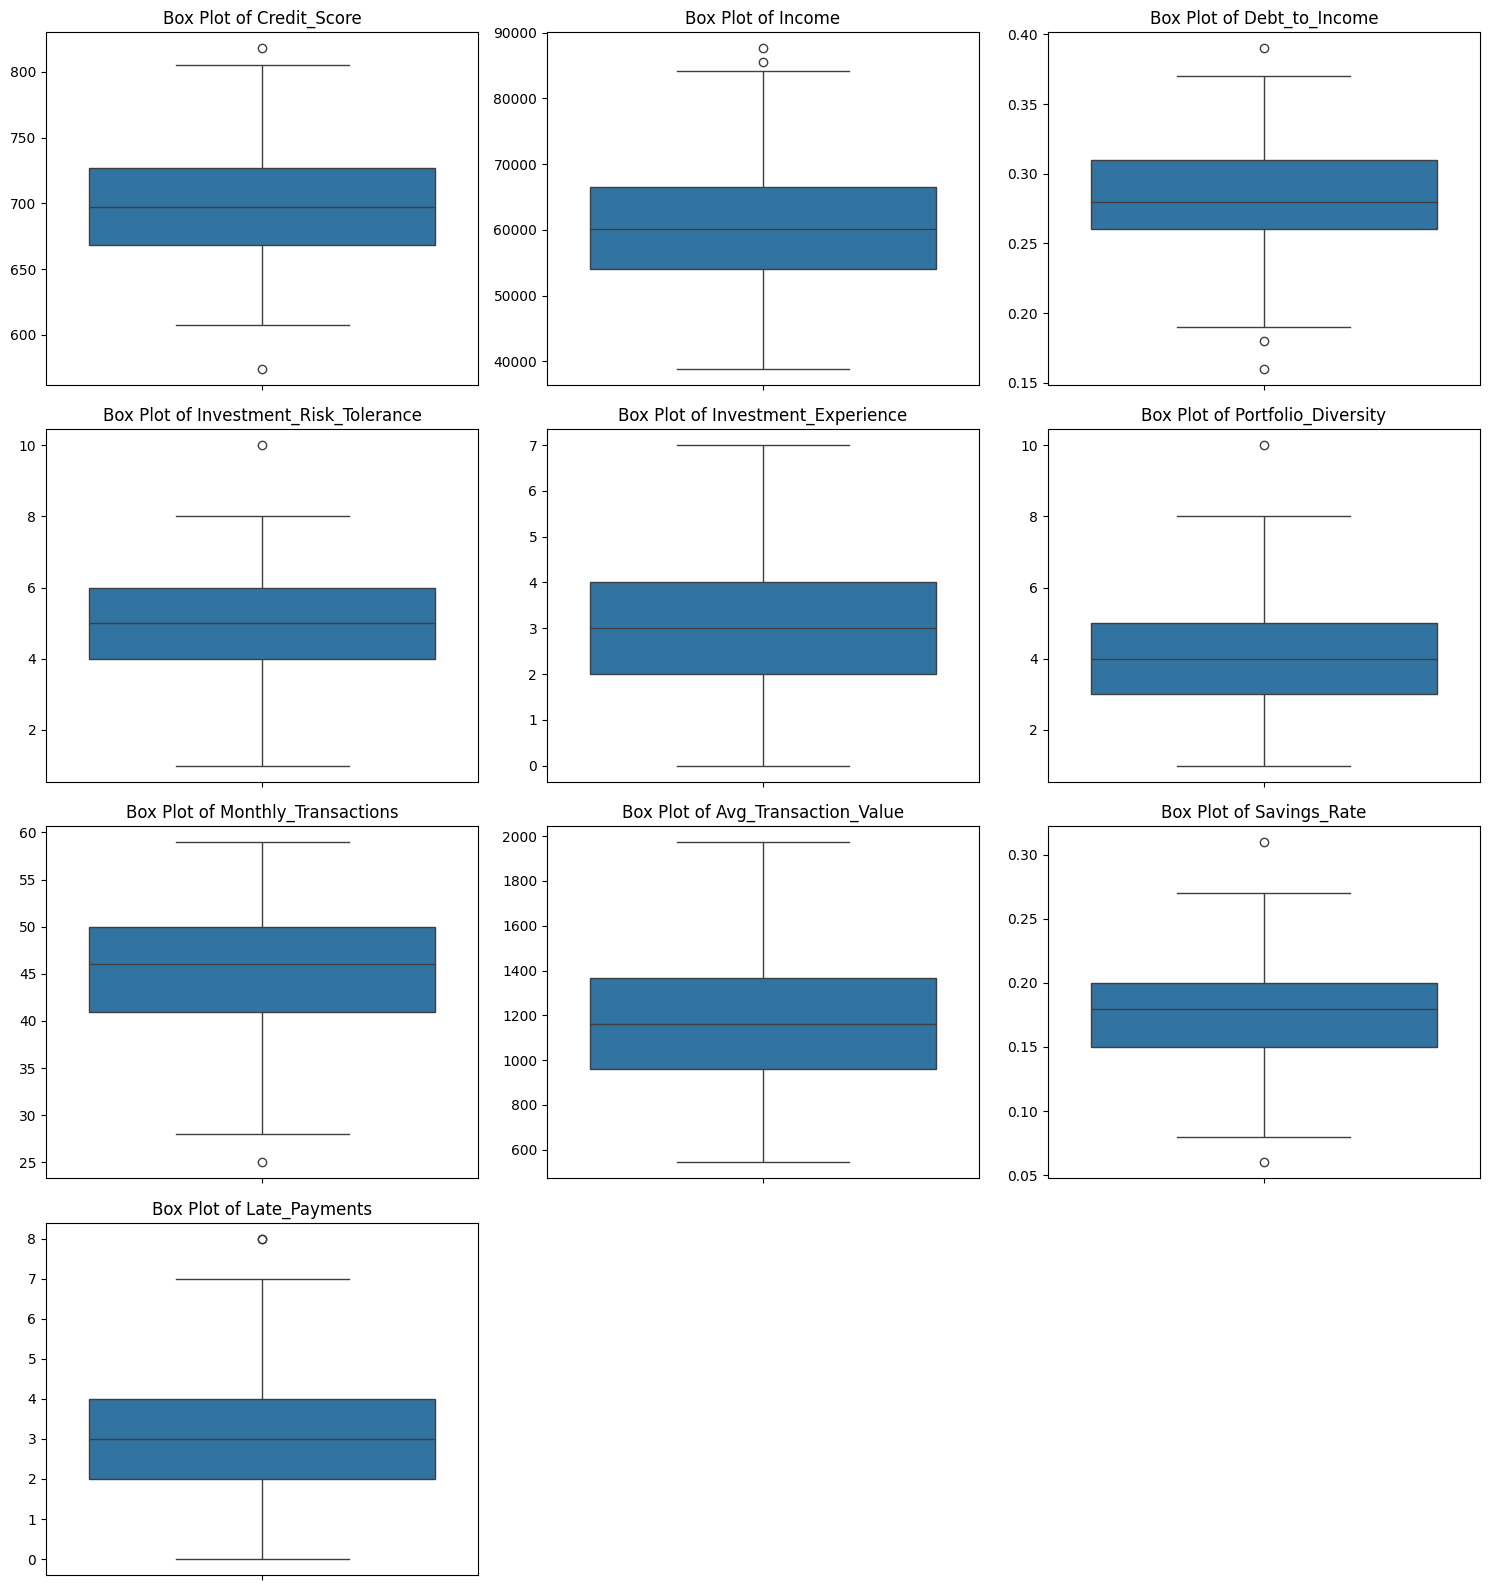

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the number of columns to plot
num_columns = df.shape[1]

# Calculate the number of rows and columns for the subplot grid
# Aim for a roughly square grid or adjust as needed
num_cols_per_row = 3  # You can adjust this number
num_rows = (num_columns + num_cols_per_row - 1) // num_cols_per_row

plt.figure(figsize=(num_cols_per_row * 5, num_rows * 4)) # Adjust figure size for better readability

for i, column in enumerate(df.columns):
    plt.subplot(num_rows, num_cols_per_row, i + 1) # Create subplots
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')
    plt.ylabel('') # Remove y-label for cleaner look as title is descriptive

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

In invester risk tolerance the value is high with 10.
Portfolio diversity is similar to investor risk tolerance where the diversity portfolio = 10

In [ ]:
df = df[~((df['Investment_Risk_Tolerance'] == 10) & (df['Portfolio_Diversity'] == 10))]
print(df.shape)

(199, 10)


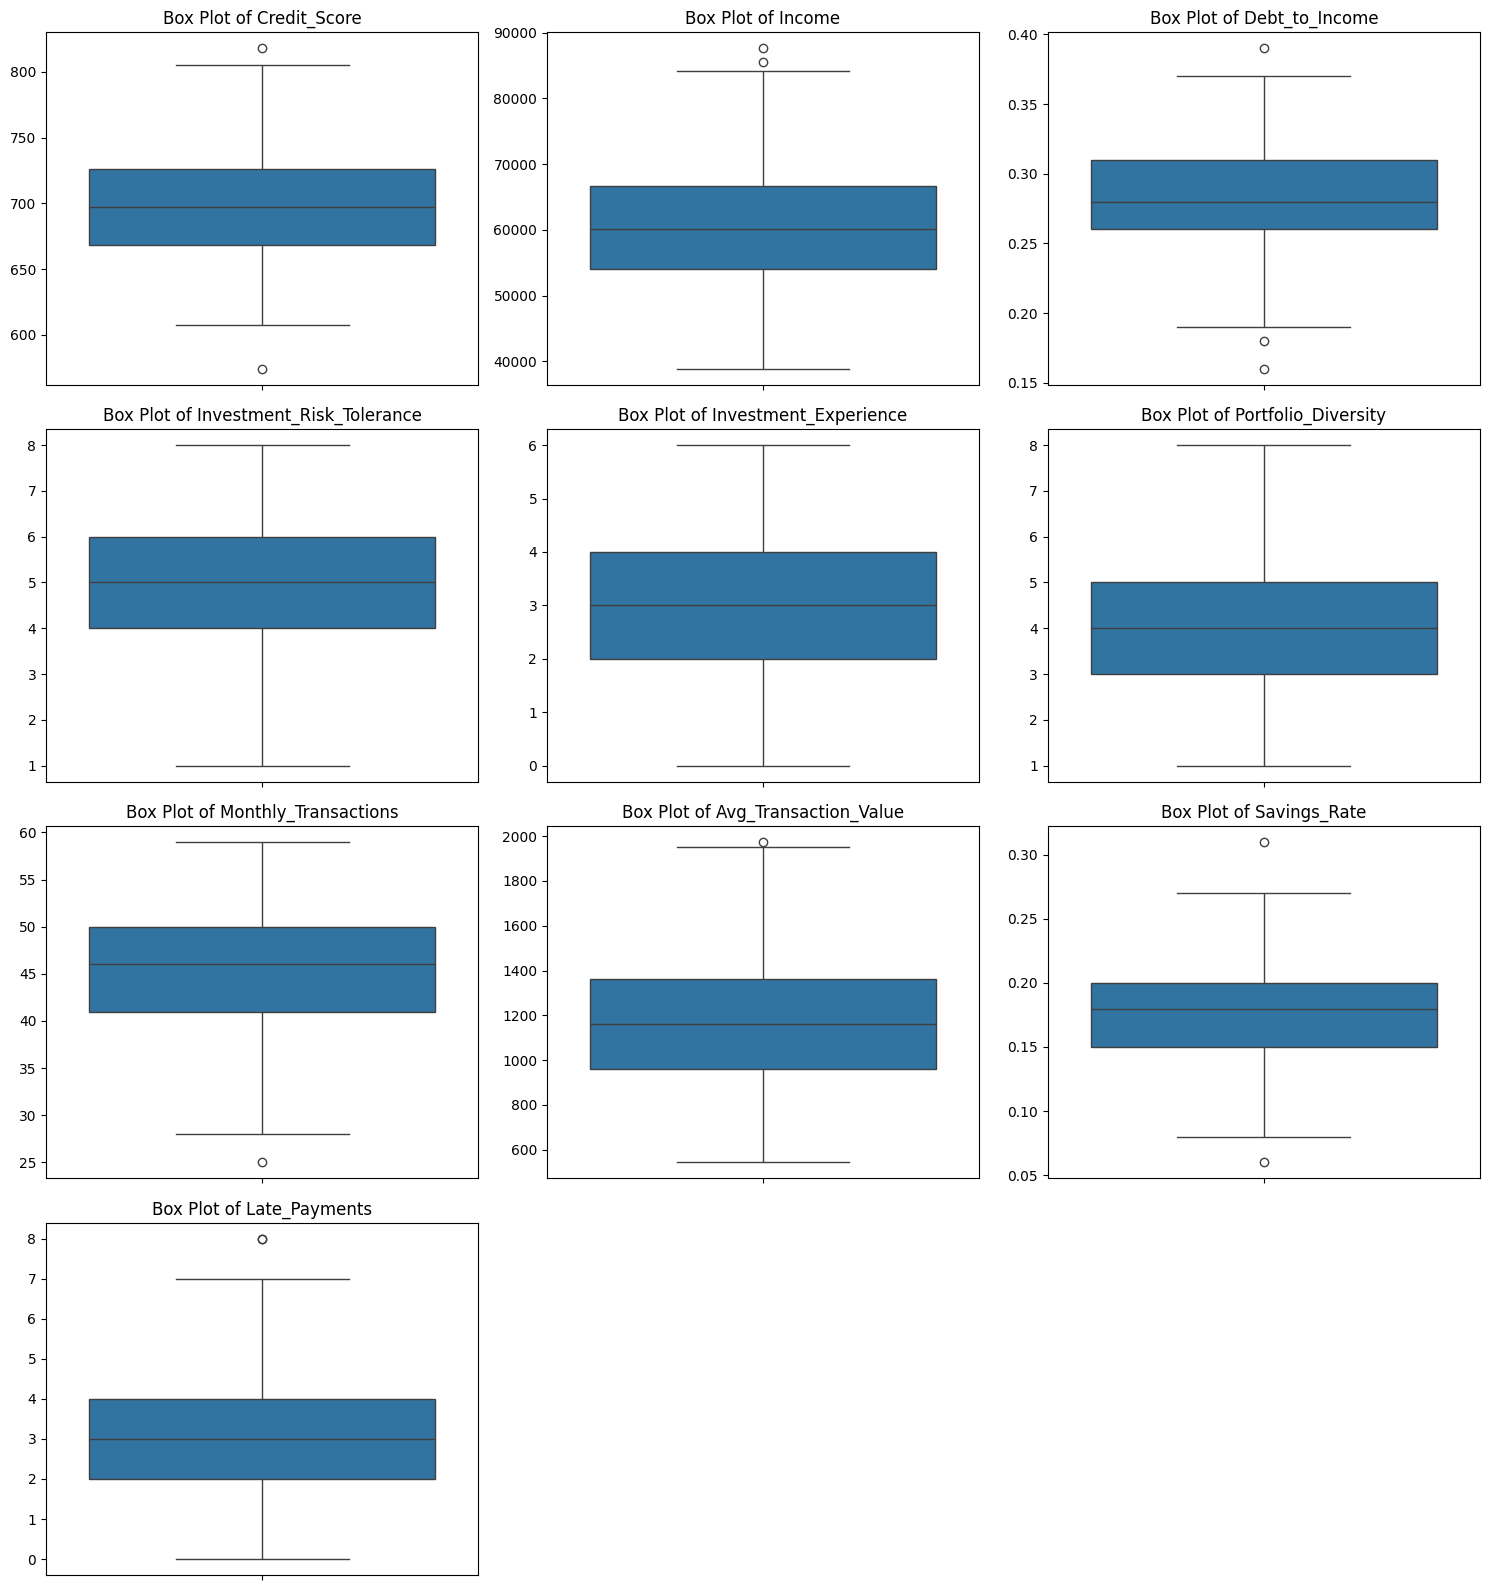

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the number of columns to plot
num_columns = df.shape[1]

# Calculate the number of rows and columns for the subplot grid
num_cols_per_row = 3  # You can adjust this number
num_rows = (num_columns + num_cols_per_row - 1) // num_cols_per_row

plt.figure(figsize=(num_cols_per_row * 5, num_rows * 4)) # Adjust figure size for better readability

for i, column in enumerate(df.columns):
    plt.subplot(num_rows, num_cols_per_row, i + 1) # Create subplots
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')
    plt.ylabel('') # Remove y-label for cleaner look as title is descriptive

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

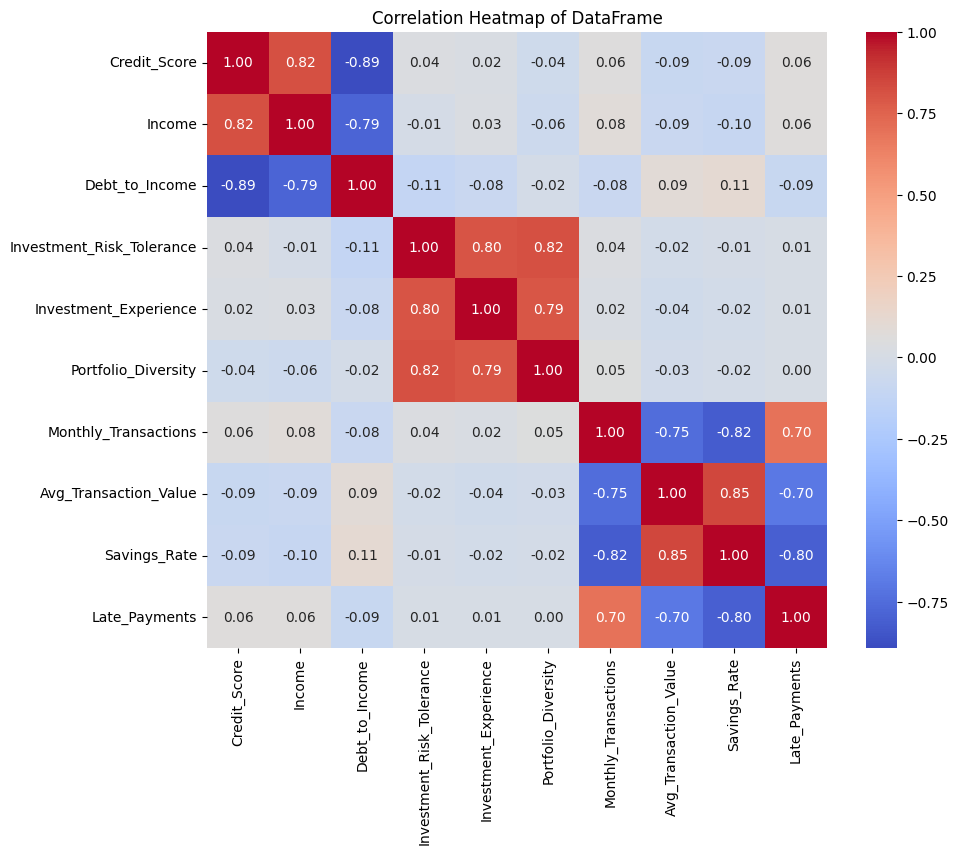

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of DataFrame')
plt.show()



* **Credit Score is strongly positively correlated with Income (0.82)** and **strongly negatively correlated with Debt-to-Income ratio (-0.89)** — meaning higher income and lower debt improve credit score.

* **Investment Experience, Risk Tolerance, and Portfolio Diversity** are all highly positively correlated (0.79–0.82), showing that experienced investors take more risk and diversify more.

* **Monthly Transactions and Average Transaction Value** are strongly negatively correlated (-0.75), meaning frequent traders make smaller-value transactions.

* **Savings Rate is strongly positively correlated with Avg Transaction Value (0.85)** and strongly negatively correlated with Monthly Transactions (-0.82), indicating disciplined savers invest larger amounts less frequently.

* **Late Payments** increase with more transactions (0.70) and decrease with higher savings rate (-0.80).


In [ ]:
import numpy as np
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [ ]:
# Select only numerical columns for VIF calculation
numerical_df = df.select_dtypes(include=np.number)

# Add a constant to the DataFrame (required for VIF calculation)
X = add_constant(numerical_df)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Exclude the constant column from the VIF results as it's not a feature
vif_data = vif_data[vif_data['feature'] != 'const']

print(vif_data.sort_values(by='VIF', ascending=False))

                      feature       VIF
9                Savings_Rate  6.543168
1                Credit_Score  6.007153
3              Debt_to_Income  5.427449
4   Investment_Risk_Tolerance  3.906077
8       Avg_Transaction_Value  3.783443
6         Portfolio_Diversity  3.688366
5       Investment_Experience  3.444925
7        Monthly_Transactions  3.280944
2                      Income  3.251542
10              Late_Payments  2.874105


Savings rate, credit score and debt to income has high VIF.


Savings rate - positive correlation with monthly transaction and late payments - negative correlation with average transaction

This represents that out of 4 columns: Savings rate, monthly transactions, avg tansaction and late payments only few columns are significant.

Credit score - positive correlation with income and negative correlation with Debt to income ratio - only few are significant.

Debt to income ratio - negative correlation with income.


### Bartlett's Test of Sphericity

Bartlett's Test of Sphericity tests whether the observed correlation matrix is significantly different from an identity matrix. An identity matrix implies that variables are uncorrelated and thus unsuitable for structure detection by factor analysis. A significant p-value (typically p < 0.05) indicates that the correlation matrix is not an identity matrix, suggesting that the variables are related and suitable for factor analysis.

In [ ]:
from scipy.stats import bartlett

numerical_df = df.select_dtypes(include=np.number)

# Perform Bartlett's test. The test requires multiple samples, typically taken as columns of the dataframe.
# To pass multiple arrays to bartlett, we use numerical_df.values.T to get each column as a separate array.
stat, p_value = bartlett(*numerical_df.values.T)

print(f"Bartlett's Test Statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("\nSince the p-value is less than 0.05, we reject the null hypothesis.")
    print("This suggests that the population variances are not equal, or the correlation matrix is significantly different from an identity matrix.")
    print("Therefore, the data is likely suitable for factor analysis.")
else:
    print("\nSince the p-value is not less than 0.05, we fail to reject the null hypothesis.")
    print("This suggests that the population variances are equal, or the correlation matrix is not significantly different from an identity matrix.")
    print("Therefore, the data might not be suitable for factor analysis.")

Bartlett's Test Statistic: 25354.8009
P-value: 0.0000

Since the p-value is less than 0.05, we reject the null hypothesis.
This suggests that the population variances are not equal, or the correlation matrix is significantly different from an identity matrix.
Therefore, the data is likely suitable for factor analysis.


#“Bartlett’s test was highly significant (χ² = 25354.80, p < 0.001), indicating sufficient correlations among variables, confirming the suitability of the dataset for factor analysis.”

#The Kaiser-Meyer-Olkin (KMO) Measure evaluates sampling adequacy for factor analysis by checking how suited the data is for dimensional reduction.

In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo
import pandas as pd
import numpy as np

# Ensure numerical_df is defined from the main dataframe 'df'
numerical_df = df.select_dtypes(include=np.number)

# Correctly unpack the return values: kmo_per_variable_array is first, kmo_overall is second
kmo_per_variable_array, kmo_overall = calculate_kmo(numerical_df)

print(f"Overall KMO: {kmo_overall:.4f}")
print("KMO per variable:")
for i, col in enumerate(numerical_df.columns):
    print(f"  {col}: {kmo_per_variable_array[i]:.4f}")

if kmo_overall >= 0.6:
    print("\nOverall KMO is acceptable, indicating that the data is suitable for factor analysis.")
else:
    print("\nOverall KMO is low, suggesting that the data might not be suitable for factor analysis.")

Overall KMO: 0.7834
KMO per variable:
  Credit_Score: 0.6899
  Income: 0.8377
  Debt_to_Income: 0.7186
  Investment_Risk_Tolerance: 0.7372
  Investment_Experience: 0.7685
  Portfolio_Diversity: 0.7603
  Monthly_Transactions: 0.8777
  Avg_Transaction_Value: 0.8411
  Savings_Rate: 0.7499
  Late_Payments: 0.8798

Overall KMO is acceptable, indicating that the data is suitable for factor analysis.


The overall **Kaiser-Meyer-Olkin (KMO) measure is 0.7834**, which falls in the **“middling to good”** range, indicating that the dataset has adequate common variance and is suitable for factor analysis.

At the variable level, most KMO values are above **0.70**, showing good individual sampling adequacy.

* **Highest adequacy:** Late_Payments (0.8798) and Monthly_Transactions (0.8777)
* **Lowest adequacy:** Credit_Score (0.6899), still acceptable

Overall, the KMO values confirm that the correlations among variables are sufficiently compact, supporting the use of **factor analysis or PCA** for dimensionality reduction.


# Task
Generate a scree plot to determine the optimal number of factors for the dataset.

## Determine number of factors

### Subtask:
Generate a scree plot to determine the optimal number of factors for the dataset.


**Reasoning**:
The subtask requires generating a scree plot to determine the optimal number of factors. This involves importing `FactorAnalyzer`, fitting it to the data, extracting eigenvalues, and then plotting them with a Kaiser criterion line.



/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


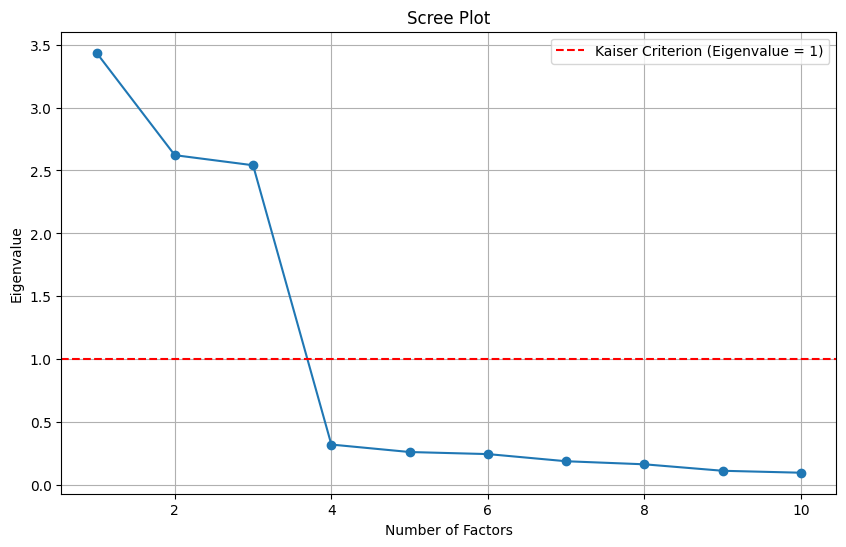

In [ ]:
from factor_analyzer.factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

# Instantiate FactorAnalyzer without specifying n_factors to calculate all possible factors
fa = FactorAnalyzer(rotation=None)

# Fit the FactorAnalyzer model to the numerical_df
fa.fit(numerical_df)

# Get the eigenvalues
eigenvalues = fa.get_eigenvalues()[0]

# Create a scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')

# Add title and labels
plt.title('Scree Plot')
plt.xlabel('Number of Factors')
plt.ylabel('Eigenvalue')

# Draw a horizontal line at y=1 (Kaiser criterion)
plt.axhline(y=1, color='r', linestyle='--', label='Kaiser Criterion (Eigenvalue = 1)')
plt.legend()
plt.grid(True)
plt.show()

#The Scree plot shows a clear elbow after the third factor, with only the first three eigenvalues exceeding 1, confirming that a three-factor model is appropriate.

# Task
## Interpret Scree Plot
Based on the scree plot and the Kaiser criterion (eigenvalues greater than 1), the optimal number of factors appears to be **3**. There are three eigenvalues above 1, and after the third factor, the eigenvalues drop significantly below 1, indicating that subsequent factors explain substantially less variance.

## Interpret Scree Plot

### Subtask:
Interpret the generated scree plot to formally state the optimal number of factors.


### Interpreting the Scree Plot

The scree plot visually represents the eigenvalues for each factor. The Kaiser criterion suggests retaining factors with eigenvalues greater than 1.

From the generated scree plot, we observe that **three** eigenvalues are above 1. These are approximately **3.44, 2.62, and 2.54**. Following these, there is a clear "elbow" or a sharp drop in the eigenvalues, with subsequent eigenvalues falling significantly below 1.

Therefore, based on the Kaiser criterion and the visual inspection of the scree plot, the optimal number of factors to retain for this dataset is **3**.

## Perform Factor Analysis

### Subtask:
Apply Factor Analysis using the determined number of factors.


**Reasoning**:
To apply Factor Analysis as instructed, I will instantiate `FactorAnalyzer` with the specified parameters, fit it to the `numerical_df`, extract the factor loadings, and then organize them into a pandas DataFrame for clear interpretation.



In [ ]:
from factor_analyzer.factor_analyzer import FactorAnalyzer
import pandas as pd

# Instantiate FactorAnalyzer with n_factors=3 and rotation='varimax'
fa = FactorAnalyzer(n_factors=3, rotation='varimax')

# Fit the FactorAnalyzer model to the numerical_df
fa.fit(numerical_df)

# Get the factor loadings
loadings = fa.loadings_

# Create a Pandas DataFrame from the factor loadings
factor_loadings_df = pd.DataFrame(
    loadings,
    index=numerical_df.columns,
    columns=['Factor 1', 'Factor 2', 'Factor 3']
)

print("Factor Loadings:")
print(factor_loadings_df)

Factor Loadings:
                           Factor 1  Factor 2  Factor 3
Credit_Score              -0.037630  0.959796 -0.004630
Income                    -0.051611  0.847165 -0.023660
Debt_to_Income             0.059044 -0.927408 -0.065714
Investment_Risk_Tolerance -0.008390  0.039465  0.911165
Investment_Experience     -0.013476  0.036942  0.880146
Portfolio_Diversity       -0.020421 -0.042943  0.901499
Monthly_Transactions      -0.851104  0.032178  0.028678
Avg_Transaction_Value      0.867388 -0.050851 -0.021058
Savings_Rate               0.976345 -0.053080 -0.002960
Late_Payments             -0.814544  0.035668 -0.006778


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


**Reasoning**:
The previous code block successfully performed Factor Analysis and generated the factor loadings. The next logical step is to interpret these factor loadings to understand what each factor represents.



In [ ]:
display(factor_loadings_df)

,Factor 1,Factor 2,Factor 3
Credit_Score,-0.037630,0.959796,-0.004630
Income,-0.051611,0.847165,-0.023660
Debt_to_Income,0.059044,-0.927408,-0.065714
Investment_Risk_Tolerance,-0.008390,0.039465,0.911165
Investment_Experience,-0.013476,0.036942,0.880146
Portfolio_Diversity,-0.020421,-0.042943,0.901499
Monthly_Transactions,-0.851104,0.032178,0.028678
Avg_Transaction_Value,0.867388,-0.050851,-0.021058
Savings_Rate,0.976345,-0.053080,-0.002960
Late_Payments,-0.814544,0.035668,-0.006778


In [ ]:
print("Top columns for Factor 1 (Transaction & Savings Behavior):")
print(factor_loadings_df['Factor 1'].abs().sort_values(ascending=False).head(4))
print("\nTop columns for Factor 2 (Financial Health / Creditworthiness):")
print(factor_loadings_df['Factor 2'].abs().sort_values(ascending=False).head(3))
print("\nTop columns for Factor 3 (Investment Engagement / Risk Appetite):")
print(factor_loadings_df['Factor 3'].abs().sort_values(ascending=False).head(3))

Top columns for Factor 1 (Transaction & Savings Behavior):
Savings_Rate             0.976345
Avg_Transaction_Value    0.867388
Monthly_Transactions     0.851104
Late_Payments            0.814544
Name: Factor 1, dtype: float64

Top columns for Factor 2 (Financial Health / Creditworthiness):
Credit_Score      0.959796
Debt_to_Income    0.927408
Income            0.847165
Name: Factor 2, dtype: float64

Top columns for Factor 3 (Investment Engagement / Risk Appetite):
Investment_Risk_Tolerance    0.911165
Portfolio_Diversity          0.901499
Investment_Experience        0.880146
Name: Factor 3, dtype: float64


#These three factors explain the underlying structure of financial behavior in the dataset–capturing transactional behavior, financial creditworthiness, and investment behavior, respectively. This provides a meaningful basis for segmentation, predictive modeling, or further analysis.

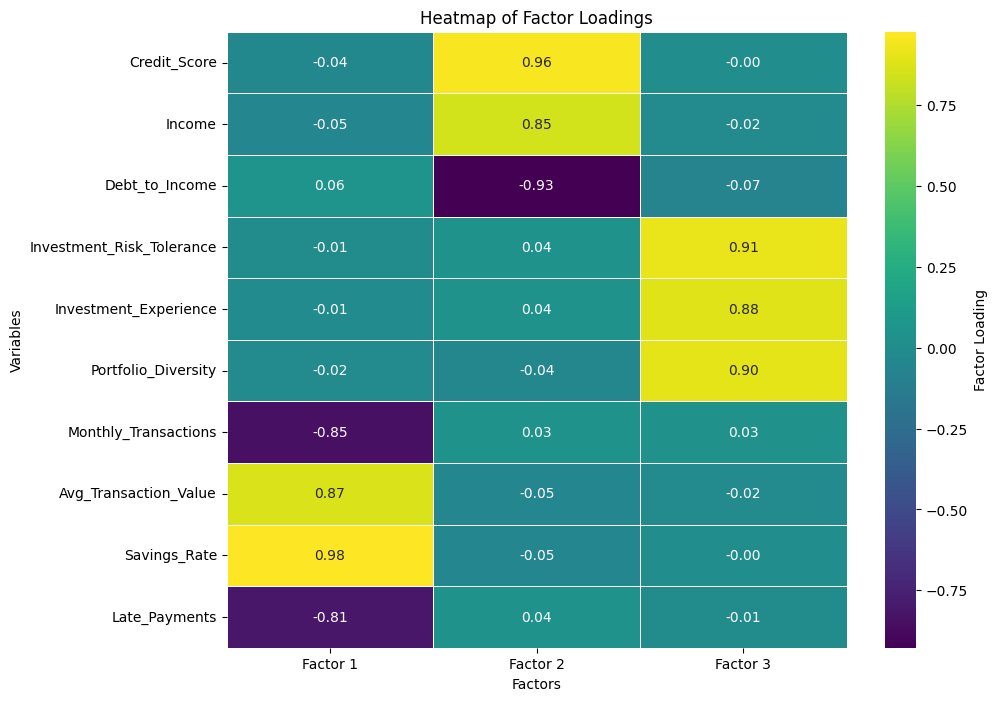

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure and axes
plt.figure(figsize=(10, 8))

# Create a heatmap of the factor loadings
sns.heatmap(factor_loadings_df,
            annot=True,     # Show the loading values on the heatmap
            cmap='viridis', # Color map for the heatmap
            fmt=".2f",      # Format the annotations to two decimal places
            linewidths=.5,  # Add lines between cells
            cbar_kws={'label': 'Factor Loading'})

plt.title('Heatmap of Factor Loadings')
plt.xlabel('Factors')
plt.ylabel('Variables')
plt.show()



The 10 variables were grouped into three distinct factors:

---

### **1. Factor 1: Transactional Discipline & Savings**
This factor is characterized by high financial responsibility.

* **Strong Positive Loadings:**
    * **Savings\_Rate (0.98)**: Highest loading, making it the defining variable.
    * **Avg\_Transaction\_Value (0.87)**: High-value transactions.
* **Strong Negative Loadings:**
    * **Monthly\_Transactions (-0.85)**: Indicates **infrequent** transactions.
    * **Late\_Payments (-0.81)**: Indicates **low** incidence of late payments.
* **Interpretation:** Represents a customer with **high savings, making large, infrequent transactions, and maintaining excellent payment discipline.**

---

### **2. Factor 2: Creditworthiness & Financial Health**
This factor defines the core financial stability of the individual.

* **Strong Positive Loadings:**
    * **Credit\_Score (0.96)**: Highest loading, indicating excellent credit.
    * **Income (0.85)**: High income level.
* **Strong Negative Loadings:**
    * **Debt\_to\_Income (-0.93)**: Indicates a **low** debt burden relative to income.
* **Interpretation:** Represents **strong financial health** with high income, high credit score, and low leverage.

---

### **3. Factor 3: Investment Engagement & Sophistication**
This factor captures behavior and attitudes related to investing.

* **Strong Positive Loadings:**
    * **Investment\_Risk\_Tolerance (0.91)**: Willingness to accept risk.
    * **Portfolio\_Diversity (0.90)**: Use of varied investment types.
    * **Investment\_Experience (0.88)**: High experience level.
* **Interpretation:** Represents an **experienced, risk-tolerant investor with a well-diversified portfolio.**

---

